# Investigation of Diver Reflex Using ECG

In [53]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

## Import data (control (holding breath) and head submerged)

In [54]:
control = pd.read_csv (r'./Held_Breath.txt', sep = '\t') 
control

,Time,Lead II
0,0.00,0.000000
1,0.01,0.000000
2,0.02,0.000000
3,0.03,0.000000
4,0.04,0.000000
...,...,...
3015,30.15,-0.079530
3016,30.16,-0.057004
3017,30.17,-0.061247
3018,30.18,-0.022577


In [55]:
dive = pd.read_csv (r'./Divers_Response.txt', sep = '\t') 
dive

,Time,Lead II
0,0.00,0.000000
1,0.01,0.000000
2,0.02,0.000000
3,0.03,0.000000
4,0.04,0.000000
...,...,...
3035,30.35,0.031240
3036,30.36,0.008320
3037,30.37,-0.014132
3038,30.38,0.005045


## Visualize control data (holding breath without submmersion)

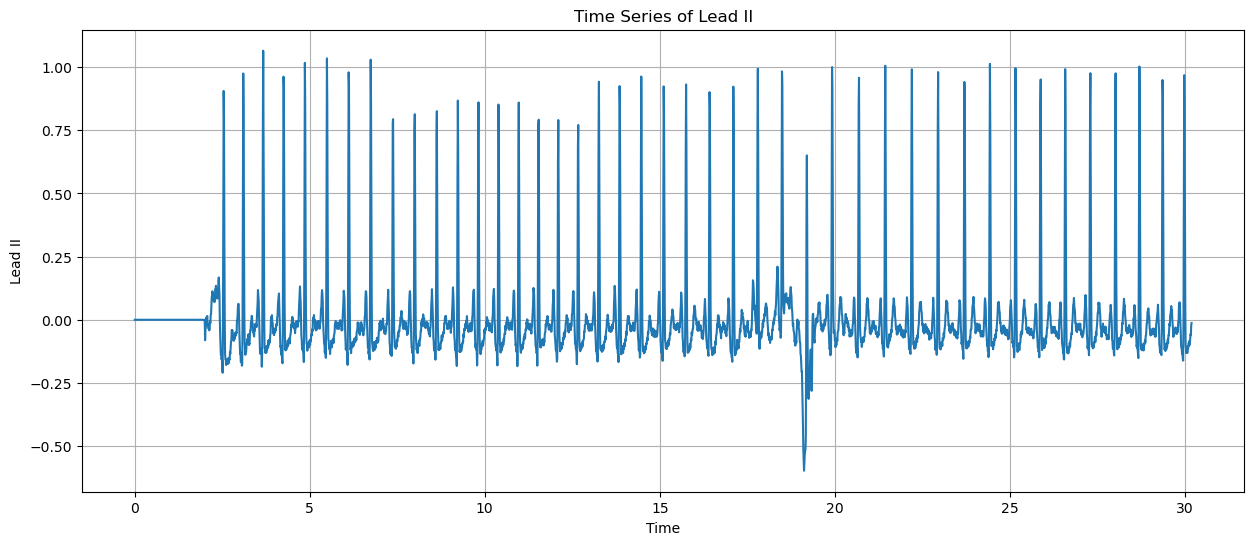

In [56]:
df = pd.DataFrame(control)

# Plot the data to visually inspect
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Lead II'])
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('Time Series of Lead II')
plt.grid(True)
plt.show()

## Detect R waves in the window between 25 and 30 seconds

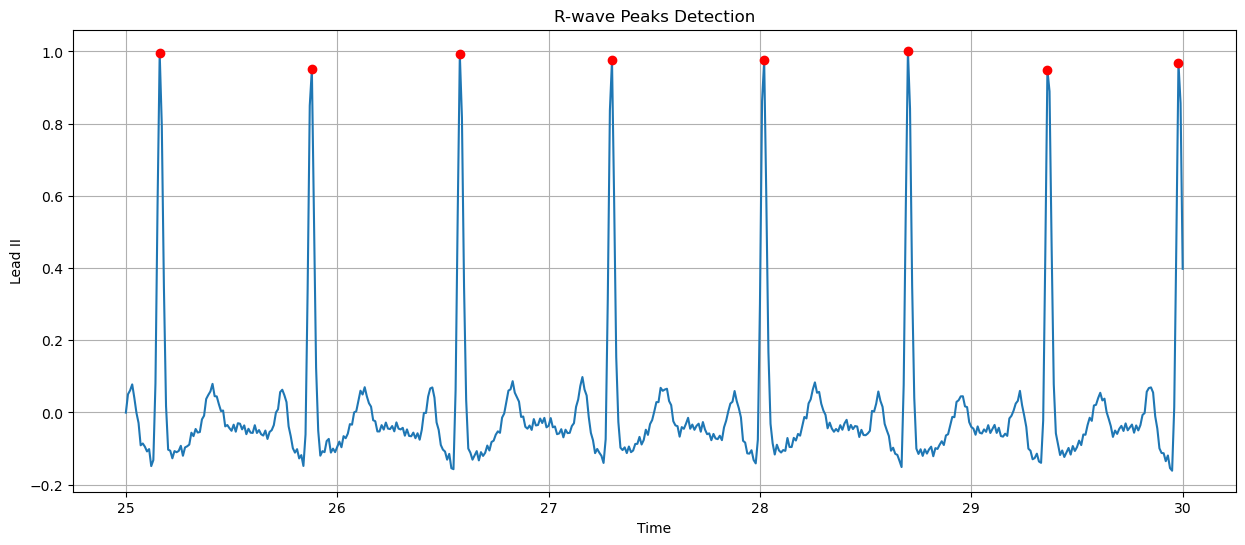

In [61]:
# Filter the DataFrame for the specific time window
windowed_df = df[(df['Time'] >= 25) & (df['Time'] <= 30)]

# Assuming you have a method to detect peaks, identify R-peaks in this window
# (You might need to adjust this depending on your peak detection method)
windowed_peak_indices, _ = find_peaks(windowed_df['Lead II'], height=.5)  # Replace 'detect_peaks' and 'ECG_Data' accordingly

# Plot the data with detected peaks
plt.figure(figsize=(15, 6))
plt.plot(windowed_df['Time'], windowed_df['Lead II'])
plt.plot(windowed_df['Time'].iloc[windowed_peak_indices], windowed_df['Lead II'].iloc[windowed_peak_indices], 'ro')
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('R-wave Peaks Detection')
plt.grid(True)
plt.show()

## Calculate the HR at the window between 25 and 30 seconds

In [66]:
# Filter the DataFrame for the specific time window
windowed_df = df[(df['Time'] >= 25) & (df['Time'] <= 30)]

# Assuming you have a method to detect peaks, identify R-peaks in this window
# (You might need to adjust this depending on your peak detection method)
windowed_peak_indices, _ = find_peaks(windowed_df['Lead II'], height=.5)  # Replace 'detect_peaks' and 'ECG_Data' accordingly

# Calculate RR intervals for this window
windowed_rr_intervals = windowed_df['Time'].iloc[windowed_peak_indices].diff().dropna().values

# Calculate heart rate in BPM for this window
average_windowed_rr_interval = windowed_rr_intervals.mean()
windowed_heart_rate = 60 / average_windowed_rr_interval

print(f"Average RR interval in the window: {average_windowed_rr_interval:.2f} seconds")
print(f"Heart rate in the window: {windowed_heart_rate:.2f} BPM")

Average RR interval in the window: 0.69 seconds
Heart rate in the window: 87.14 BPM


## Visualize the data from face submerged in icy water

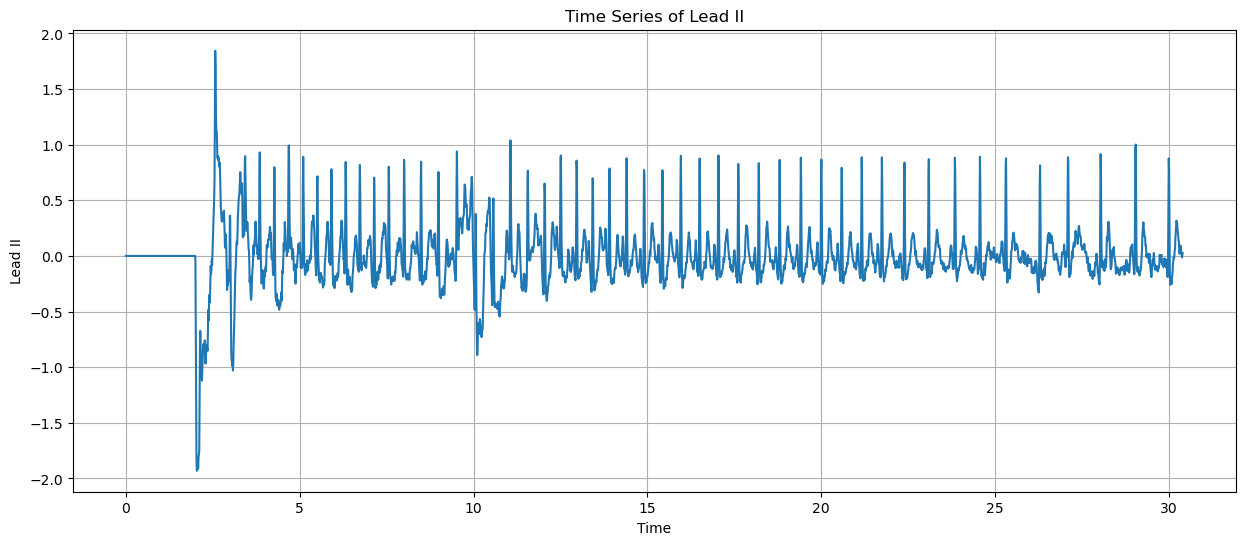

In [67]:
df2 = pd.DataFrame(dive)

# Plot the data to visually inspect
plt.figure(figsize=(15, 6))
plt.plot(df2['Time'], df2['Lead II'])
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('Time Series of Lead II')
plt.grid(True)
plt.show()

## Detect R waves in the window between 25 and 30 seconds

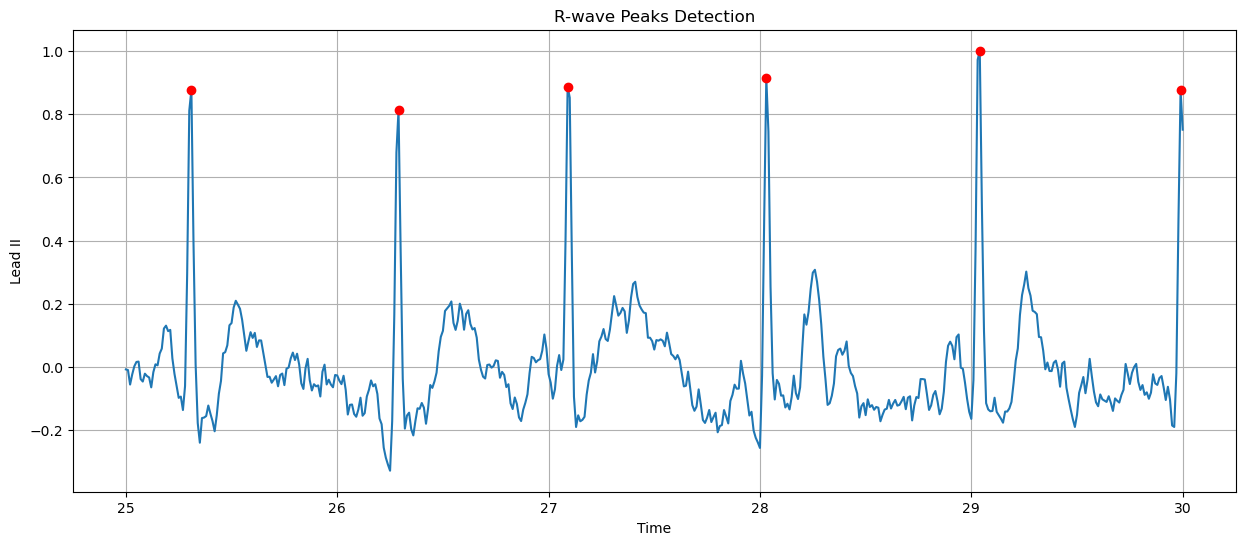

In [71]:
# Filter the DataFrame for the specific time window
windowed_df2 = df2[(df2['Time'] >= 25) & (df2['Time'] <= 30)]

# Assuming you have a method to detect peaks, identify R-peaks in this window
# (You might need to adjust this depending on your peak detection method)
windowed_peak_indices2, _ = find_peaks(windowed_df2['Lead II'], height=.5)  # Replace 'detect_peaks' and 'ECG_Data' accordingly

# Plot the data with detected peaks
plt.figure(figsize=(15, 6))
plt.plot(windowed_df2['Time'], windowed_df2['Lead II'])
plt.plot(windowed_df2['Time'].iloc[windowed_peak_indices2], windowed_df2['Lead II'].iloc[windowed_peak_indices2], 'ro')
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('R-wave Peaks Detection')
plt.grid(True)
plt.show()

## Calculate the HR at the window between 25 and 30 seconds

In [72]:
# Filter the DataFrame for the specific time window
windowed_df2 = df2[(df2['Time'] >= 25) & (df2['Time'] <= 30)]

# Assuming you have a method to detect peaks, identify R-peaks in this window
# (You might need to adjust this depending on your peak detection method)
windowed_peak_indices2, _ = find_peaks(windowed_df2['Lead II'], height=.5)  # Replace 'detect_peaks' and 'ECG_Data' accordingly

# Calculate RR intervals for this window
windowed_rr_intervals = windowed_df2['Time'].iloc[windowed_peak_indices2].diff().dropna().values

# Calculate heart rate in BPM for this window
average_windowed_rr_interval = windowed_rr_intervals.mean()
windowed_heart_rate = 60 / average_windowed_rr_interval

print(f"Average RR interval in the window: {average_windowed_rr_interval:.2f} seconds")
print(f"Heart rate in the window: {windowed_heart_rate:.2f} BPM")

Average RR interval in the window: 0.94 seconds
Heart rate in the window: 64.10 BPM
